# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [32]:
# import libraries here:

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [8]:
# your answer here:
data=pd.read_csv('Employee.csv')
employee=pd.DataFrame(data)

In [40]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [11]:
# your answer:

employee.pivot_table(index=['Department'],values=['Salary'])

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [25]:
# your answer:
employee.groupby('Department').mean().Salary

TypeError: agg function failed [how->mean,dtype->object]

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [24]:
# your answer here

employee.pivot_table(index=['Department','Title'],values=['Salary'])

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [28]:
# your answer here:

employee.pivot_table(index=['Title'],
                     columns=['Years'],
                     values=['Salary'])

Salary                              
Years          1     2     3     4     7     8
Title                                         
VP           NaN   NaN   NaN   NaN   NaN  70.0
analyst     35.0  30.0   NaN  35.0   NaN   NaN
associate    NaN  55.0  55.0   NaN  60.0   NaN

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [31]:
# your answer here:

employee.pivot_table(index=['Title','Department'],values=['Salary'])

Salary
Title     Department        
VP        HR            70.0
          IT            70.0
analyst   HR            32.5
          IT            32.5
associate IT            60.0
          Sales         55.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [34]:
# your answer here:

employee.pivot_table(index=['Department','Title'],
                     values=['Salary'],
                     aggfunc=('median','min','max',np.std))

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70       NaN
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70       NaN
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60       NaN
Sales      associate     55   55.0  55  0.000000

1. El departamento no afecta al sueldo
2. El salario es mas alto en los puesto de VP y el mínimo es el de los asociados.
3. Tenemos diferencias entre los salarios que cobran los analistas pero no tenemos mas parametros para ver el motivo
4. Los valores nulos se deben a que no se puede calcular la desviación con solo un valor

#### Based on your comments, fill the missing values with an appropriate value

In [36]:
# your answer here: No lo tocaría ya que es un valor nulo correcto, en todo caso pondría un 0.

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [39]:
# your answer here:

employee.pivot_table(index=['Department'],
                     values=['Salary'],
                     aggfunc=('count', 'sum'))

Salary     
            count  sum
Department            
HR              3  135
IT              4  195
Sales           2  110

#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [47]:
# your answer here:

employee.pivot_table(index=['Department', 'Title'],
                     values=['Years', 'Salary'],
                     aggfunc={'Years': 'sum', 'Salary': 'mean'}
                    )

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [ ]:
# your answer here

In [ ]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [48]:
# your answer here:
data=pd.read_csv('Fitbit.csv')
fitbit=pd.DataFrame(data)

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [49]:
# your answer here:
fitbit.describe().T

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.501362,916.307036,179.000,2698.000,2974.00,3233.00,4351.00
Steps,367.0,10121.588556,5594.836225,0.000,6730.500,10413.00,13916.50,26444.00
Distance,367.0,8.549128,3.409881,0.000,6.155,8.29,10.56,20.45
Floors,367.0,11.724796,10.337370,0.000,5.000,11.00,16.00,101.00
Minutes Sedentary,367.0,563.934482,294.793145,1.002,520.000,663.00,756.50,998.00
Minutes Lightly Active,367.0,236.405995,86.531376,0.000,179.000,226.00,290.00,472.00
Minutes Fairly Active,367.0,26.163488,20.319456,0.000,8.000,24.00,41.50,101.00
Minutes Very Active,367.0,35.722071,31.006682,0.000,10.500,29.00,54.00,153.00
Activity Calories,367.0,2044.147139,2041.267168,0.000,1218.500,1553.00,1927.50,9830.00
MinutesOfSleep,367.0,290.479564,154.752328,0.000,224.000,337.00,400.50,553.00


In [50]:
# your answer here:
fitbit.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [51]:
# your answer here:
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062606

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

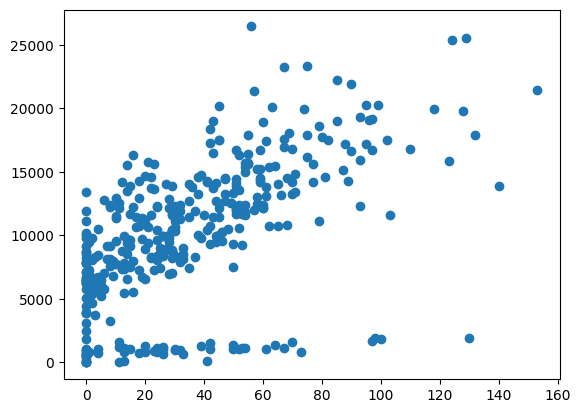

In [57]:
# your answer here:

plt.scatter(x = fitbit['Minutes Very Active'],
            y = fitbit['Steps'] )

plt.show();

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your comment here: Hay relacion entre el tiempo de actividad y pasos, cuando aumneta una la otra tambien. 

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [ ]:
# your answer here

In [ ]:
# Your comment here

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [ ]:
# your answer here

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [ ]:
# your answer here

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [ ]:
# your answer here

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [ ]:
# your answer here

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [ ]:
# your answer here

#### Show visually the frequency distribution of the time_grades dataset.

In [ ]:
# your answer here

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [ ]:
# your answer 

In [ ]:
## your answer

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [ ]:
# your answer here

In [ ]:
#your comment here

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
#your comment here